In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [213]:
df = pd.read_csv('dirty_cafe_sales.csv')
df2 = pd.read_csv('dirty_cafe_sales.csv')

In [215]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4550 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    4550 non-null   object
 1   Item              4550 non-null   object
 2   Quantity          4550 non-null   object
 3   Price Per Unit    4550 non-null   object
 4   Total Spent       4550 non-null   object
 5   Payment Method    4550 non-null   object
 6   Location          4550 non-null   object
 7   Transaction Date  4550 non-null   object
dtypes: object(8)
memory usage: 319.9+ KB


In [217]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [221]:
df.shape

(10000, 8)

In [223]:
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'UNKNOWN',
       'Sandwich', nan, 'ERROR', 'Juice', 'Tea'], dtype=object)

In [225]:
df[df['Item'] == 'Cookie']['Price Per Unit'].unique()

array(['1.0', 'UNKNOWN', nan, 'ERROR'], dtype=object)

In [227]:
df[df['Item'] == 'Cake']['Price Per Unit'].unique()

array(['3.0', nan, 'UNKNOWN', 'ERROR'], dtype=object)

In [229]:
df[df['Item'] == 'ERROR']['Price Per Unit'].unique()

array(['1.5', '3.0', '5.0', nan, '4.0', '2.0', '1.0', 'UNKNOWN', 'ERROR'],
      dtype=object)

In [231]:
df[df['Item'] == 'UNKNOWN']['Price Per Unit'].unique()

array(['3.0', '1.0', '5.0', '4.0', '1.5', '2.0', nan, 'UNKNOWN', 'ERROR'],
      dtype=object)

In [233]:
def maskfun(df, col):
    mask1 = df[col] != 'ERROR'
    df = df[mask1]
    mask2 = df[col] != 'UNKNOWN'
    df = df[mask2]
    df.dropna(subset=[col], inplace=True)
    return df
df = maskfun(df, 'Item')
df['Item'].unique()

array(['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Sandwich',
       'Juice', 'Tea'], dtype=object)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    9031 non-null   object
 1   Item              9031 non-null   object
 2   Quantity          8910 non-null   object
 3   Price Per Unit    8873 non-null   object
 4   Total Spent       8877 non-null   object
 5   Payment Method    6701 non-null   object
 6   Location          6086 non-null   object
 7   Transaction Date  8888 non-null   object
dtypes: object(8)
memory usage: 635.0+ KB


In [237]:
perunitprice = {}
for i in df['Item'].unique():
     perunitprice[i] = (df[df['Item'] == i]['Price Per Unit'].unique()[0])
for key, value in perunitprice.items():
    print(key, value)

Coffee 2.0
Cake 3.0
Cookie 1.0
Salad 5.0
Smoothie 4.0
Sandwich 4.0
Juice 3.0
Tea 1.5


In [239]:
nonevalues = ['UNKNOWN', 'ERROR']
for key, value in perunitprice.items():
    mask = (df['Item'] == key) & ((df['Price Per Unit'].isin(nonevalues)) | df['Price Per Unit'].isna())
    df.loc[mask, 'Price Per Unit'] = value

In [241]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [243]:
df['Price Per Unit'] = df['Price Per Unit'].astype(float)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9031 non-null   object 
 1   Item              9031 non-null   object 
 2   Quantity          8910 non-null   object 
 3   Price Per Unit    9031 non-null   float64
 4   Total Spent       8877 non-null   object 
 5   Payment Method    6701 non-null   object 
 6   Location          6086 non-null   object 
 7   Transaction Date  8888 non-null   object 
dtypes: float64(1), object(7)
memory usage: 635.0+ KB


In [247]:
df['Quantity'].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [249]:
for idx, i in df.iterrows():
    if i['Quantity'] not in ['ERROR', 'UNKNOWN'] and pd.notna(i['Quantity']):
        df.at[idx, 'Total Spent'] = float(i['Quantity']) * float(i['Price Per Unit'])

In [250]:
for idx, i in df.iterrows():
    if i['Total Spent'] not in ['ERROR', 'UNKNOWN'] and pd.notna(i['Total Spent']):
        df.at[idx, 'Quantity'] = float(i['Total Spent']) / float(i['Price Per Unit'])

In [252]:
df['Quantity'].unique()

array([2.0, 4.0, 5.0, 3.0, 1.0, 'ERROR', 'UNKNOWN', nan], dtype=object)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9031 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9031 non-null   object 
 1   Item              9031 non-null   object 
 2   Quantity          9023 non-null   object 
 3   Price Per Unit    9031 non-null   float64
 4   Total Spent       9026 non-null   object 
 5   Payment Method    6701 non-null   object 
 6   Location          6086 non-null   object 
 7   Transaction Date  8888 non-null   object 
dtypes: float64(1), object(7)
memory usage: 893.0+ KB


In [257]:
df = maskfun(df, 'Quantity')
df = maskfun(df, 'Total Spent')

In [259]:
df['Quantity'].unique()

array([2.0, 4.0, 5.0, 3.0, 1.0], dtype=object)

In [261]:
df['Quantity'] = df['Quantity'].astype(float)
df['Total Spent'] = df['Total Spent'].astype(float)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9011 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9011 non-null   object 
 1   Item              9011 non-null   object 
 2   Quantity          9011 non-null   float64
 3   Price Per Unit    9011 non-null   float64
 4   Total Spent       9011 non-null   float64
 5   Payment Method    6688 non-null   object 
 6   Location          6071 non-null   object 
 7   Transaction Date  8868 non-null   object 
dtypes: float64(3), object(5)
memory usage: 633.6+ KB


In [265]:
df['Payment Method'].unique()

array(['Credit Card', 'Cash', 'UNKNOWN', 'Digital Wallet', nan, 'ERROR'],
      dtype=object)

In [267]:
df = maskfun(df,'Payment Method')

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6141 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    6141 non-null   object 
 1   Item              6141 non-null   object 
 2   Quantity          6141 non-null   float64
 3   Price Per Unit    6141 non-null   float64
 4   Total Spent       6141 non-null   float64
 5   Payment Method    6141 non-null   object 
 6   Location          4169 non-null   object 
 7   Transaction Date  6050 non-null   object 
dtypes: float64(3), object(5)
memory usage: 431.8+ KB


In [271]:
df = maskfun(df,'Transaction Date')

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    5872 non-null   object 
 1   Item              5872 non-null   object 
 2   Quantity          5872 non-null   float64
 3   Price Per Unit    5872 non-null   float64
 4   Total Spent       5872 non-null   float64
 5   Payment Method    5872 non-null   object 
 6   Location          3985 non-null   object 
 7   Transaction Date  5872 non-null   object 
dtypes: float64(3), object(5)
memory usage: 412.9+ KB


In [275]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    5872 non-null   object        
 1   Item              5872 non-null   object        
 2   Quantity          5872 non-null   float64       
 3   Price Per Unit    5872 non-null   float64       
 4   Total Spent       5872 non-null   float64       
 5   Payment Method    5872 non-null   object        
 6   Location          3985 non-null   object        
 7   Transaction Date  5872 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 412.9+ KB


In [279]:
df['Location'].fillna(df['Location'].mode()[0], inplace=True)

C:\Users\Isha\AppData\Local\Temp\ipykernel_27832\4150753581.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna(df['Location'].mode()[0], inplace=True)


In [281]:
df['Location'].mode()

0    Takeaway
Name: Location, dtype: object

In [283]:
df['Location'].unique()

array(['Takeaway', 'In-store', 'UNKNOWN', 'ERROR'], dtype=object)

In [321]:
df['Location'] = df['Location'].replace('ERROR', df['Location'].mode().iloc[0])
df['Location'] = df['Location'].replace('UNKNOWN', df['Location'].mode().iloc[0])

In [323]:
df['Location'].unique()

array(['Takeaway', 'In-store'], dtype=object)

In [325]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5.0,4.0,20.0,Credit Card,Takeaway,2023-03-31


In [327]:
df.to_csv('output.csv', index=False)

In [329]:
pd.crosstab(df['Item'], [df['Payment Method'], df['Location']], rownames=['Item'], colnames=['Payment Method', 'Location'])

Payment Method     Cash          Credit Card          Digital Wallet         
Location       In-store Takeaway    In-store Takeaway       In-store Takeaway
Item                                                                         
Cake                 79      185          59      180             72      167
Coffee               69      161          68      164             60      196
Cookie               63      171          88      150             66      183
Juice                84      173          76      188             89      189
Salad                94      179          91      179             72      156
Sandwich             79      161          72      169             84      158
Smoothie             65      157          59      184             73      170
Tea                  68      164          68      151             79      160

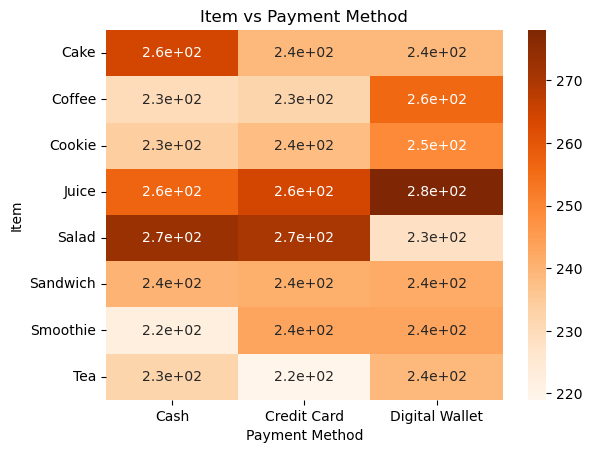

In [331]:
ct2 = pd.crosstab(df['Item'], df['Payment Method'])

sns.heatmap(ct2, annot=True, cmap='Oranges')
plt.title("Item vs Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Item")
plt.show()
